In [1]:
import pandas as pd

# shot_list_sheet_1 = pd.read_excel("./dataset/KSTAR_Disruption_Shot_List.csv", sheet_name = 'Sheet1')
# shot_list_sheet_2 = pd.read_excel("./dataset/KSTAR_Disruption_Shot_List.csv", sheet_name = 'Sheet2')
short_list_sheet = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List.csv")

In [2]:
short_list_sheet

,shot,year,tftsrt,tipminf,tTQend,Isdata
0,12350,2015,1.500,5.246,5.2248,NaN
1,12372,2015,0.700,3.818,3.8026,NaN
2,12415,2015,1.900,4.769,4.7450,NaN
3,12438,2015,1.100,3.702,3.6826,NaN
4,12481,2015,1.900,5.217,5.1923,NaN
...,...,...,...,...,...,...
1091,21730,2018,1.500,4.968,4.9490,NaN
1092,21731,2018,1.500,4.913,4.8950,NaN
1093,21735,2018,1.500,89.746,89.7320,NaN
1094,21747,2018,3.724,11.451,11.4190,NaN


In [3]:

from src.dataloader import VideoDataset
from torch.utils.data import DataLoader

batch_size = 4
train_data_dist10 = VideoDataset(dataset = "fast_model_dataset", split = "train", clip_len = 8, preprocess = False)
train_loader_dist10 = DataLoader(train_data_dist10, batch_size = batch_size, shuffle = True, num_workers = 4)


/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of train videos: 1240


sample_img :  torch.Size([3, 112, 112])


/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_functional_video.py:5: UserWarning: The _functional_video module is deprecated. Please use the functional module instead.
  warnings.warn(
/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_transforms_video.py:25: UserWarning: The _transforms_video module is deprecated. Please use the transforms module instead.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


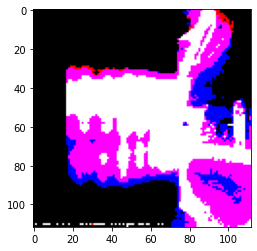

In [4]:
sample_data, sample_label = next(iter(train_loader_dist10))
sample_img = sample_data[0, :, 0, :, :]

print("sample_img : ", sample_img.size())

from src.utility import show_frame

show_frame(sample_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


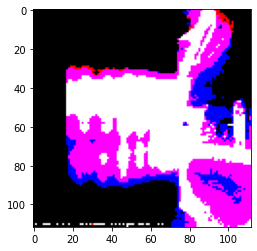

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


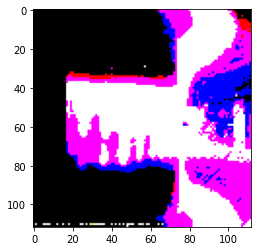

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


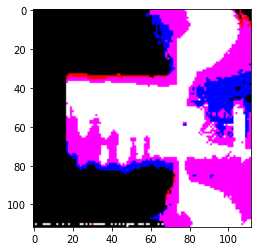

In [5]:
for idx in range(sample_data.size(1)):
    sample_img = sample_data[0, :, idx, :, :]
    show_frame(sample_img)

In [6]:
from src.model import VideoSpatioEncoder

encoder = VideoSpatioEncoder(
    input_shape  = (3, 8, 112, 112),
    STN_conv_channels  = [1, 8, 16], 
    STN_conv_kernels  = [8, 4],
    STN_conv_strides  = [1, 1],
    STN_conv_paddings  = [1, 1],
    STN_pool_strides  =  [2, 2],
    STN_pool_kernels  = [2, 2],
    alpha  = 0.01,
    STN_theta_dim = 64
)

RuntimeError: Given groups=1, weight of size [8, 1, 1, 8, 8], expected input[1, 3, 8, 112, 112] to have 1 channels, but got 3 channels instead